In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from sklearn.metrics import r2_score, auc
from sklearn.preprocessing import StandardScaler

In [2]:
# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def train_test_model(reg, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    reg.fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)   # Make prediction on the training data
    y_test_pred = reg.predict(X_test)  # Make predictions on test data
    return y_train_pred, y_test_pred

# Numerical Analysis on the RMSE, R^2 and return the plot of y_true versus y_predicted
def anaylsisplt( X_test, y_train, y_train_pred, y_test, y_test_pred):
    rms1 = sqrt(mean_squared_error(y_train, y_train_pred))
    rms1 = round(rms1,5)
    rms2 = sqrt(mean_squared_error(y_test, y_test_pred))
    rms2 = round(rms2, 5)
    print('Returns the coefficient of determination R^2 of the prediction is {0:.3f}.'.format(reg.score(X_test, y_test)))
    fig = plt.figure()
    axx1 = fig.add_subplot(111)
    axx1.scatter(y_train, y_train_pred, s=1, c='b', marker="s")
    axx1.scatter(y_test, y_test_pred, s=10, c='r', marker="s")
    z = np.polyfit(y_test, y_test_pred, 1)
    plt.text(-3.5, -0.5, 'Train RMSE = %s\n Test RMSE = %s\n' % (rms1, rms2))
    p = np.poly1d(z)
    axx1.plot(y_test, p(y_test), "k--")
    plt.show()

# Enter the filename and Target group anaylzed in the future steps
# filename = input('Input the filename you want to anaylsis:')
# group = int(input('Which group do you want to anaylsis(1:OH or 0:CO):'))
df = pd.read_csv('Results_ML6_ABS.csv')

# Features interested and implemented in the machine learing alogorithm
selected_features = [u'nega_1', u'nega_2', u'nega_3',  u'nega_4', u'nega_5', u'nega_6',u'nega_7',u'nega_8',
 u'aff_1', u'aff_2', u'aff_3',   u'aff_4',  u'aff_5',  u'aff_6', u'aff_7', u'aff_8',
 u'val_1',  u'val_2',  u'val_3', u'val_4', u'val_5',  u'val_6', u'val_7', u'val_8', 
 u'ioni1_1', u'ioni1_2',   u'ioni1_3', u'ioni1_4',  u'ioni1_5', u'ioni1_6',u'ioni1_7',u'ioni1_8',  u'ioni2_1', u'ioni2_2',  
u'ioni2_3', u'ioni2_4',  u'ioni2_5', u'ioni2_6',u'ioni2_7',u'ioni2_8' ,  u'radius_1', u'radius_2',   u'radius_3', u'radius_4',  
                     u'radius_5', u'radius_6',u'radius_7',u'radius_8',u'redox_1', u'redox_2',   u'redox_3', u'redox_4',  
                     u'redox_5', u'redox_6',u'redox_7',u'redox_8',u'TC_1',u'TC_2', u'TC_3', u'TC_4',  
                     u'TC_5', u'TC_6',u'TC_7',u'TC_8',u'HF_1',u'HF_2', u'HF_3', u'HF_4',  
                     u'HF_5', u'HF_6',u'HF_7',u'HF_8',u'resis_1',u'resis_2', u'resis_3', u'resis_4',  
                     u'resis_5', u'resis_6',u'resis_7',u'resis_8', u'iradius_1',u'iradius_2', u'iradius_3', u'iradius_4',  
                     u'iradius_5', u'iradius_6',u'iradius_7',u'iradius_8', u'oxir_1',u'oxir_2', u'oxir_3', u'oxir_4',  
                     u'oxir_5', u'oxir_6',u'oxir_7',u'oxir_8',u'hyden_1',u'hyden_2', u'hyden_3', u'hyden_4',  
                     u'hyden_5', u'hyden_6',u'hyden_7',u'hyden_8',u'ioni3_1',u'ioni3_2', u'ioni3_3', u'ioni3_4',  
                     u'ioni3_5', u'ioni3_6',u'ioni3_7',u'ioni3_8',u'ioni4_1',u'ioni4_2', u'ioni4_3', u'ioni4_4',  
                     u'ioni4_5', u'ioni4_6',u'ioni4_7',u'ioni4_8',u'ioni5_1',u'ioni5_2', u'ioni5_3', u'ioni5_4',  
                     u'ioni5_5', u'ioni5_6',u'ioni5_7',u'ioni5_8', u'EC_1',u'EC_2', u'EC_3', u'EC_4',  
                     u'EC_5', u'EC_6',u'EC_7',u'EC_8', u'NC_1',u'NC_2', u'NC_3', u'NC_4',  
                     u'NC_5', u'NC_6',u'NC_7',u'NC_8',u'NM_1',u'NM_2', u'NM_3', u'NM_4',  
                     u'NM_5', u'NM_6',u'NM_7',u'NM_8', u'SH_1',u'SH_2', u'SH_3', u'SH_4',  
                     u'SH_5', u'SH_6',u'SH_7',u'SH_8',u'LCx_1',u'LCx_2', u'LCx_3', u'LCx_4',  
                     u'LCx_5', u'LCx_6',u'LCx_7',u'LCx_8',u'LCz_1',u'LCz_2', u'LCz_3', u'LCz_4',  
                     u'LCz_5', u'LCz_6',u'LCz_7',u'LCz_8']
# if depends on the previous input value
# if group == 1:
#     target = u'O'
# else:
#     target = u'CO'
target = u'Mag'
# In[13]:
X = df[selected_features].values
y = df[target].values
print(X.shape)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
#
# X_new = SelectKBest(f_regression).fit_transform(X, y)
# print(X_new.shape)
# #Data prepossessing: X standardizing and remove some outliers , y using sigmod function is limited to range from 0 to 1
# X = preprocessing.robust_scale(X_new)

#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(2)
#X = poly.fit_transform(X)

X = preprocessing.normalize(X, norm='l1')
#X = preprocessing.robust_scale(X)

#X = sigmoid(X)
#y = preprocessing.robust_scale(y)
# In[17]:
# Split the data sets into training set and test set

from sklearn.ensemble import RandomForestRegressor
# regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
# regr.fit(X,y)
# print(regr.feature_importances_)
#kf = KFold(**parameters)
#kf.get_n_splits(X)
#print(kf)
#for train_index, test_index in kf.split(X):
   # X_train, X_test = X[train_index], X[test_index]
   # y_train, y_test = y[train_index], y[test_index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
#from sklearn.decomposition import PCA

# Let's pick a n_components
#n_components = 26

#pca = PCA(n_components)

#X_train = pca.fit_transform(X_train)# fit: get V, lambda; transform: X_train*V
#X_test = pca.transform(X_test)

#pca_range = np.arange(n_components) + 1
#pca_names = ['PCA_%s' % i for i in pca_range]
#plt.bar(pca_range[:26], pca.explained_variance_[:26], align='center')
#xticks = plt.xticks(pca_range[:26], pca_names, rotation=90)
#plt.ylabel('Variance Explained')
#Scikit_learning_neural_network_parameters
 #Random Forest Regressor Method
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
# Random forest feature importance
#rf_reg = RandomForestRegressor()
#rf_reg.fit(X_train, y_train)
#for feature in zip(selected_features, rf_reg.feature_importances_):
#    #print(rf_reg.feature_importances_)
#    sfm = SelectFromModel(rf_reg, threshold=0.0005)
#    sfm.fit(X_train, y_train)
#    #print(rf_reg.feature_importances_)
#for feature_list_index in sfm.get_support(indices=True):
#    print(selected_features[feature_list_index])
#X_train = sfm.transform(X_train)
#X_test = sfm.transform(X_test)
# recursive feature elimination
estimator = xgb.XGBRegressor()
selector = RFECV(estimator, step=1, cv=3)
selector = selector.fit(X_train, y_train)
print("Optimal number of features : %d" % selector.n_features_)
for feature_list_index in selector.get_support(indices=True):
   print(selected_features[feature_list_index])
selector.support_ 
print(selector.ranking_) 
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

(501, 176)
Optimal number of features : 106
nega_1
nega_2
nega_3
nega_4
nega_5
nega_6
nega_8
aff_1
aff_2
aff_3
aff_4
aff_5
aff_6
aff_7
aff_8
val_2
val_5
val_6
ioni1_2
ioni1_4
ioni1_5
ioni1_6
ioni1_7
ioni1_8
ioni2_2
ioni2_3
ioni2_4
ioni2_5
ioni2_6
ioni2_7
ioni2_8
radius_1
radius_2
radius_3
radius_4
radius_5
radius_8
redox_4
redox_5
TC_5
TC_7
HF_1
HF_2
HF_4
HF_5
HF_6
HF_7
HF_8
resis_1
resis_3
resis_4
resis_7
resis_8
iradius_3
iradius_5
iradius_6
iradius_7
iradius_8
oxir_1
oxir_6
oxir_7
hyden_1
hyden_2
hyden_3
hyden_4
hyden_5
hyden_7
hyden_8
ioni3_3
ioni3_5
ioni3_8
ioni4_1
ioni4_2
ioni4_4
ioni4_5
ioni4_6
ioni4_8
ioni5_1
ioni5_2
ioni5_4
ioni5_5
ioni5_7
ioni5_8
EC_4
EC_5
EC_6
EC_7
EC_8
NC_2
NC_3
NC_5
NC_7
NC_8
NM_5
SH_1
SH_2
SH_5
SH_7
LCx_1
LCx_3
LCx_4
LCx_5
LCx_7
LCz_1
LCz_3
LCz_5
[ 1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  7  1 59 20  1  1 32 16
  8  1 38  1  1  1  1  1  9  1  1  1  1  1  1  1  1  1  1  1  1  4 36  1
 33 39 43  1  1 41 14 61 71 21 62 56  1 10  1 58  1  1 19  1  1  1

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.8s finished


Best parameters found by grid search are: {'booster': 'gbtree', 'colsample_bytree': 0.2, 'gamma': 0.14, 'learning_rate': 0.06, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.4}
The rmse of train prediction is: 0.22379017682560043
The rmse of test prediction is: 0.46229597923471893
The MAE of train prediction is: 0.16959524354934694
The MAE of test prediction is: 0.37645659221516975
0.8802334477247702


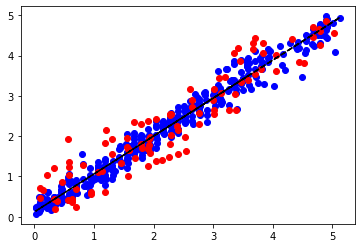

In [3]:
#xgboost parameter tunning

estimator = xgb.XGBRegressor()

param_grid = {
    'booster': ['gbtree'],
    'max_depth':[6],
    'learning_rate':[0.06],
    'min_child_weight':[3], 
    'gamma':[0.14],
    'subsample':[0.4],
    'colsample_bytree':[0.2]

}
gbm = GridSearchCV(estimator, param_grid,scoring='neg_mean_squared_error', cv=10, verbose=1, n_jobs=4)
#from sklearn.model_selection import KFold
#parameters = {
    #'n_splits': 4,
    #'shuffle': True,
    #'random_state': 0
   # }

gbm.fit(X_train, y_train)
y_pred0 = gbm.predict(X_train)
y_pred = gbm.predict(X_test)
for i in range(len(y_test)):
    if y_test[i] > 3 and y_test[i] < 3.3:
        if y_pred[i]>1.5 and y_pred[i]<2.:
            list_p =[y_test[i], y_pred[i]]
            print(str(list_p))
#y_predv = gbm.predict(X_val)
#from sklearn.model_selection import cross_val_predict
#y_pred0 = cross_val_predict(gbm, X_train, y_train, cv=5)
print('Best parameters found by grid search are:', gbm.best_params_)
print('The rmse of train prediction is:', mean_squared_error(y_train, y_pred0) ** 0.5)
print('The rmse of test prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print('The MAE of train prediction is:', mean_absolute_error(y_train, y_pred0))
print('The MAE of test prediction is:', mean_absolute_error(y_test, y_pred))
#print('The MAE of val prediction is:', mean_absolute_error(y_val, y_predv))
x1 = np.array(y_train)
x2 = np.array(y_test)
y1 = np.array(y_pred0)
y2 = np.array(y_pred)
plt.plot(x1, y1,'bo', x2, y2, 'ro')
z = np.polyfit(x1, y1, 1)
p = np.poly1d(z)
plt.plot(x1,p(x1),"k--")
print(r2_score(y_test, y_pred))

The MAE of train prediction is: 0.49423274209489493
The MAE of test prediction is: 0.4240694317562485


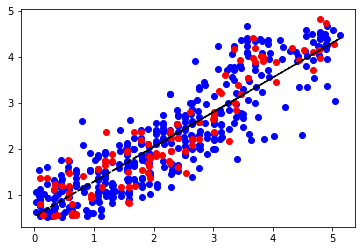

In [4]:
from sklearn.neural_network import MLPRegressor

est = MLPRegressor(hidden_layer_sizes=(8,),
                                       activation='relu',
                                       solver='lbfgs',
                                       learning_rate='adaptive',
                                       max_iter=10000,
                                       learning_rate_init=0.01,
                                       alpha=0.004)
est.fit(X_train, y_train)
y_predA0 = est.predict(X_train)
y_predA = est.predict(X_test)
print('The MAE of train prediction is:', mean_absolute_error(y_train, y_predA0))
print('The MAE of test prediction is:', mean_absolute_error(y_test, y_predA))
x1 = np.array(y_train)
x2 = np.array(y_test)
y1 = np.array(y_predA0)
y2 = np.array(y_predA)
plt.plot(x1, y1,'bo', x2, y2, 'ro')
z = np.polyfit(x1, y1, 1)
p = np.poly1d(z)
plt.plot(x1,p(x1),"k--")

In [5]:
from sklearn.kernel_ridge import KernelRidge
clf = KernelRidge(alpha=1.0, coef0=1, degree=2, gamma=None, kernel='linear',
            kernel_params=None)
clf.fit(X_train, y_train)
y_predL0 = clf.predict(X_train)
y_predL = clf.predict(X_test)
print('The MAE of train prediction is:', mean_absolute_error(y_train, y_predL0))
print('The MAE of test prediction is:', mean_absolute_error(y_test, y_predL))

The MAE of train prediction is: 1.1020075059095713
The MAE of test prediction is: 1.1102307233043445
